In [2]:
import pandas as pd
import datetime
import numpy as np
data = pd.read_csv('prepare_pca1.csv',header=0)

In [19]:
y = [i for i in data.columns]
y

['平均速度',
 '平均行驶速度',
 '平均加速度',
 '平均减速度',
 '怠速时间比',
 '加速时间比',
 '减速时间比',
 '速度标准差',
 '加速度标准差']

In [21]:
# 去掉平均速度为0的运动学片段
v = data['平均速度']
data = data[v!=0]
data

,平均速度,平均行驶速度,平均加速度,平均减速度,怠速时间比,加速时间比,减速时间比,速度标准差,加速度标准差
0,6.918841,7.577778,0.162641,-0.162641,0.101449,0.666667,0.333333,5.235478,0.273635
1,26.113784,35.134909,0.117793,-0.121171,0.259459,0.694595,0.305405,18.474106,0.238199
2,20.258333,24.555556,0.181713,-0.182176,0.183333,0.675000,0.325000,14.192889,0.296735
5,27.821495,39.958389,0.112150,-0.112150,0.308411,0.719626,0.280374,22.649353,0.247671
6,39.050292,46.696503,0.147336,-0.147661,0.169591,0.672515,0.327485,25.673176,0.346495
7,29.793665,35.980328,0.178733,-0.180995,0.176471,0.696833,0.303167,19.946636,0.292568
8,44.541667,49.665929,0.146274,-0.146440,0.105159,0.595238,0.404762,22.579967,0.259614
9,38.192090,42.647833,0.181758,-0.181924,0.107463,0.710448,0.289552,20.496108,0.331446
10,29.177020,37.271290,0.198232,-0.203423,0.222222,0.712121,0.287879,20.646950,0.391151
12,0.500000,0.000000,0.138889,-0.138889,1.000000,0.666667,0.333333,0.707107,0.208333


In [22]:
len(data)

1578

In [49]:
# 将dataframe
X = data.values
X.shape

(1578, 9)

In [50]:
# 对数据集X 进行归一化
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X)
X = standardScaler.transform(X)

In [60]:
X[:5]

array([[-0.57337311, -0.61504935,  0.31739514, -0.24586284, -0.76478803,
         0.18083859, -0.18083859, -0.56502505, -0.3131501 ],
       [ 0.8100177 ,  1.20058158, -0.3403949 ,  0.34438566, -0.36492845,
         0.40796284, -0.40796284,  1.48758184, -0.49156621],
       [ 0.38801195,  0.50354961,  0.59712627, -0.52390947, -0.55757275,
         0.24860954, -0.24860954,  0.82379286, -0.19684804],
       [ 0.93309347,  1.5183817 , -0.42316495,  0.47279278, -0.24105144,
         0.61153245, -0.61153245,  2.13494046, -0.44388013],
       [ 1.74235946,  1.96232953,  0.09291619, -0.03264777, -0.59234991,
         0.22839715, -0.22839715,  2.60377457,  0.053689  ]])

In [54]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(X)
X_reduction = pca.transform(X)

In [58]:
# 求出每个维度对方差的贡献值,这些贡献值默认按从大到小进行排列
pca_all = PCA(n_components=X.shape[1])
pca_all.fit(X)
X_all = pca.transform(X)
variance_ratio = pca_all.explained_variance_ratio_
variance_ratio

array([4.29675569e-01, 3.05423831e-01, 1.70344830e-01, 3.96661186e-02,
       3.53857440e-02, 1.52603429e-02, 3.21516349e-03, 1.02840025e-03,
       1.79184617e-32])

In [55]:
# 方差贡献度为0.95,共5个主成分
X_reduction.shape

(1578, 5)

In [56]:
# 每个主成分的贡献度
pca.explained_variance_ratio_

array([0.42967557, 0.30542383, 0.17034483, 0.03966612, 0.03538574])

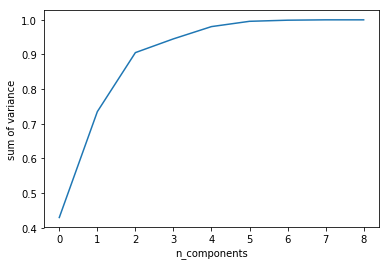

In [64]:
import matplotlib.pyplot as plt

plt.plot(
    [i for i in range(X.shape[1])],
    [np.sum(variance_ratio[:i+1]) for i in range(X.shape[1])]
)
plt.ylabel('sum of variance')
plt.xlabel('n_components')
plt.savefig('./n_components.jpg', dpi=1080)
plt.show()